In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [10]:

ecommerce_data = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/f3649763-a982-4a26-9144-5d14214c9664/ecommerce_consumers.csv")
ecommerce_data.head()


,ratio,time,label
0,0.54,17.2,female
1,0.93,18.2,male
2,0.84,13.6,female
3,0.19,6.0,male
4,0.89,13.2,female


In [11]:
 ecommerce_data.label = ecommerce_data.label.map({'female': 0, 'male': 1})

In [12]:
ecommerce_data.head()

,ratio,time,label
0,0.54,17.2,0
1,0.93,18.2,1
2,0.84,13.6,0
3,0.19,6.0,1
4,0.89,13.2,0


In [23]:
x = ecommerce_data.drop(columns=['label'], axis=1)
y = ecommerce_data[['label']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=True)

## Logistic Regression Algorithm:

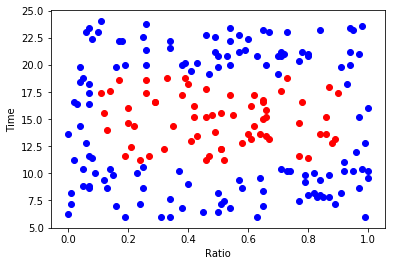

In [21]:
male = ecommerce_data[ecommerce_data.label == 0]
female = ecommerce_data[ecommerce_data.label == 1]
plt.figure()
plt.scatter(x=male['ratio'], y=male['time'], label='Male/Female vs Time spent in the portal', color='red')
plt.scatter(x=female['ratio'], y=female['time'], label='Male/Female vs Time spent in the portal', color='blue')
plt.xlabel('Ratio')
plt.ylabel('Time')
plt.show()

In [25]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.6333333333333333

In [29]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.63      1.00      0.78        38

   micro avg       0.63      0.63      0.63        60
   macro avg       0.32      0.50      0.39        60
weighted avg       0.40      0.63      0.49        60



In [30]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[ 0, 22],
       [ 0, 38]])

## SVM classification model

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [58]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 | 

In [67]:
svc_model = SVC(kernel='rbf')
hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
folds = KFold(n_splits=5, shuffle=True, random_state=True)
gs_svc_model = GridSearchCV(svc_model,
                            param_grid=hyper_params,
                            return_train_score=True,
                            cv=folds,
                            scoring='accuracy')
gs_svc_model.fit(x_train, y_train)
results = pd.DataFrame(gs_svc_model.cv_results_)
results

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002647,0.000387,0.001206,0.000365,1,0.01,"{'C': 1, 'gamma': 0.01}",0.821429,0.892857,0.821429,...,0.857143,0.045175,3,0.875000,0.883929,0.892857,0.875000,0.901786,0.885714,0.010412
1,0.002214,0.000125,0.000956,0.000179,1,0.001,"{'C': 1, 'gamma': 0.001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
2,0.004466,0.001527,0.001779,0.000784,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
3,0.003103,0.000767,0.001103,0.000404,10,0.01,"{'C': 10, 'gamma': 0.01}",0.821429,0.892857,0.821429,...,0.857143,0.045175,3,0.857143,0.848214,0.883929,0.848214,0.892857,0.866071,0.018729
4,0.002808,0.001222,0.000927,0.000334,10,0.001,"{'C': 10, 'gamma': 0.001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
5,0.002292,0.000544,0.000876,0.000198,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
6,0.001925,0.000088,0.000759,0.000112,100,0.01,"{'C': 100, 'gamma': 0.01}",0.892857,0.892857,0.857143,...,0.878571,0.036422,1,0.857143,0.857143,0.892857,0.866071,0.910714,0.876786,0.021429
7,0.002067,0.000334,0.000719,0.000020,100,0.001,"{'C': 100, 'gamma': 0.001}",0.857143,0.892857,0.821429,...,0.864286,0.041650,2,0.883929,0.875000,0.883929,0.875000,0.910714,0.885714,0.013122
8,0.001982,0.000088,0.000874,0.000122,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
9,0.002907,0.000806,0.001118,0.000297,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.857143,0.892857,0.785714,...,0.850000,0.057143,6,0.883929,0.875000,0.910714,0.883929,0.919643,0.894643,0.017313


<function matplotlib.pyplot.show(*args, **kw)>

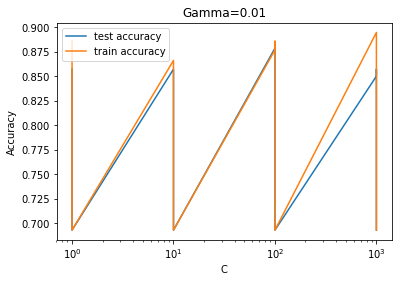

In [68]:
results['param_C'] = results['param_C'].astype('int')

plt.figure()
plt.plot(results["param_C"], results["mean_test_score"], label='aa')
plt.plot(results["param_C"], results["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show

In [69]:
gs_svc_model.best_score_

0.8785714285714286

In [70]:
gs_svc_model.best_params_

{'C': 100, 'gamma': 0.01}

## Decision Tree: 

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt_model = DecisionTreeClassifier()
hyper_params = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': range(10, 200, 10),
    'min_samples_split': range(10, 200, 10)
}
folds = KFold(n_splits=5, shuffle=True, random_state=True)
gs_dt_model = GridSearchCV(dt_model,
                           param_grid=hyper_params,
                           return_train_score=True,
                           n_jobs=-1,
                           cv=folds,
                           scoring='accuracy')
gs_dt_model.fit(x_train, y_train)
dt_results = pd.DataFrame(gs_svc_model.cv_results_)
dt_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003638,0.000663,0.001677,0.000380,1,0.01,"{'C': 1, 'gamma': 0.01}",0.821429,0.892857,0.821429,...,0.857143,0.045175,3,0.875000,0.883929,0.892857,0.875000,0.901786,0.885714,0.010412
1,0.002564,0.000610,0.001127,0.000321,1,0.001,"{'C': 1, 'gamma': 0.001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
2,0.003479,0.001224,0.001737,0.000787,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
3,0.002494,0.000661,0.000763,0.000085,10,0.01,"{'C': 10, 'gamma': 0.01}",0.821429,0.892857,0.821429,...,0.857143,0.045175,3,0.857143,0.848214,0.883929,0.848214,0.892857,0.866071,0.018729
4,0.002169,0.000435,0.000720,0.000011,10,0.001,"{'C': 10, 'gamma': 0.001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
5,0.001937,0.000229,0.000743,0.000053,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
6,0.001947,0.000167,0.000750,0.000088,100,0.01,"{'C': 100, 'gamma': 0.01}",0.892857,0.892857,0.857143,...,0.878571,0.036422,1,0.857143,0.857143,0.892857,0.866071,0.910714,0.876786,0.021429
7,0.001928,0.000098,0.000915,0.000261,100,0.001,"{'C': 100, 'gamma': 0.001}",0.857143,0.892857,0.821429,...,0.864286,0.041650,2,0.883929,0.875000,0.883929,0.875000,0.910714,0.885714,0.013122
8,0.002057,0.000181,0.000861,0.000101,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.714286,0.642857,0.678571,...,0.692857,0.036422,7,0.687500,0.705357,0.696429,0.678571,0.696429,0.692857,0.009105
9,0.003288,0.000914,0.001259,0.000687,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.857143,0.892857,0.785714,...,0.850000,0.057143,6,0.883929,0.875000,0.910714,0.883929,0.919643,0.894643,0.017313


In [52]:
gs_dt_model.best_score_

0.9

In [53]:
gs_dt_model.best_params_

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10}

<function matplotlib.pyplot.show(*args, **kw)>

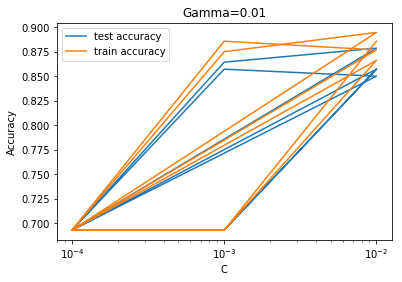

In [55]:
# dt_results['param_gamma'] = dt_results['param_gamma'].astype('int')

plt.figure()
plt.plot(dt_results["param_gamma"], dt_results["mean_test_score"], label='aa')
plt.plot(dt_results["param_gamma"], dt_results["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show

In [56]:
dtc = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 10, min_samples_split= 10)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [57]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.9833333333333333